In [3]:
import pandas as pd
import numpy as np
fileName = '../Result/mit/socialFeatureResult.xlsx'
predictionData = pd.read_excel(fileName,sheetname='Sheet1')
predictionData = predictionData.sort(columns='Social Features').loc[:,'test'].as_matrix()
#print predictionData

correlation = pd.read_csv('./correlation_array', index_col = 0)
correlation_attr = correlation.loc[:,'attractive']
correlation_attr = correlation_attr.sort_index()
features = list(correlation_attr.index)
correlation_attr = correlation_attr.as_matrix()
#print features



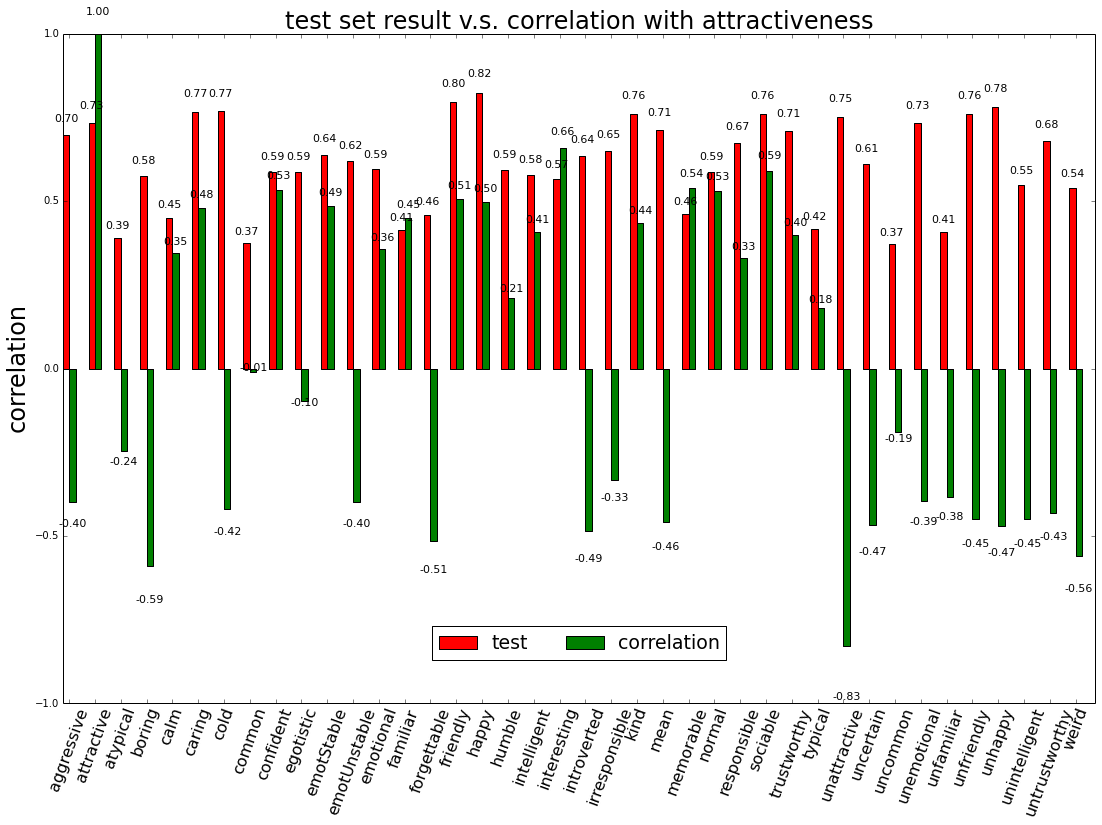

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
N = len(features)
lSize = 24
ind = np.arange(N)  # the x locations for the groups
width = 0.25       # the width of the bars

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 12)
rects1 = ax.bar(ind, predictionData, width, color='r')

rects2 = ax.bar(ind + width, correlation_attr, width, color='g')

# add some text for labels, title and axes ticks
ax.set_ylabel('correlation',fontsize = lSize)
ax.set_title('test set result v.s. correlation with attractiveness',fontsize = lSize)
ax.set_xticks(ind + width)
ax.set_xticklabels(features,fontsize = lSize-8,rotation=70)



def autolabel(rects,ser):
    # attach some text labels
    for rect, var in zip(rects, range(len(ser))):        
        height = ser[var]
        if height > 0:
            ypos = 1.05*height
        else:
            ypos = 1.2*height
        ax.text(rect.get_x() + rect.get_width()/2., ypos,
                '%.2f' % height,
                ha='center', va='bottom',fontsize = lSize-13)

autolabel(rects1,predictionData)
autolabel(rects2,correlation_attr)
ax.legend((rects1[0], rects2[0]), ('test', 'correlation'),fontsize = lSize-5,\
          loc='lower center',bbox_to_anchor=(0.5, 0.05),ncol = 2)
plt.show()
fig.savefig('./correlationBar.png')

In [6]:
len(predictionData)

40